# STAGE 1. E-Commerce Dataset #Bukapedia
Kelompok 1: 
- Fildzah Zhafarina 
- Nabilah Nurul Fikri 
- Wahyuni 
- Sakti Hakim Nasution 
- Ryan Hardi 
- Alfian Darmawan 
- Tiurmauli Rahel Ernita

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.21.6
pandas version :  1.3.5
seaborn version :  0.11.2


In [2]:
sns.set(rc={'figure.figsize': (20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read Dataset
df = pd.read_excel('/content/drive/MyDrive/Kelompok 1/Document /E Commerce Dataset.xlsx','E Comm')
data = df
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5599,55600,0,10.0,Mobile Phone,3,10.0,Credit Card,Female,4.0,5,Fashion,1,Married,2,0,20.0,1.0,4.0,5.0,201.44
4576,54577,0,12.0,Computer,1,9.0,Debit Card,Male,3.0,4,Mobile Phone,1,Married,3,1,24.0,2.0,2.0,1.0,142.02
1873,51874,1,13.0,Computer,3,14.0,COD,Male,2.0,3,Laptop & Accessory,3,Married,4,1,14.0,0.0,1.0,3.0,167.96
5500,55501,0,10.0,Mobile Phone,3,17.0,COD,Female,4.0,5,Laptop & Accessory,3,Married,3,1,14.0,1.0,2.0,8.0,181.73
826,50827,0,14.0,Computer,3,16.0,Credit Card,Male,2.0,5,Laptop & Accessory,4,Single,2,0,13.0,3.0,11.0,9.0,161.51


## Descriptive Statistics

In [5]:
#informasi general dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

cek kolom tipe data apakah sudah sesuai 

In [6]:
#cek missing value setiap kolom
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

1. Terdapat missing value di beberapa kolom seperti Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder
2. Tipe data sudah sesuai

In [8]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [9]:
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2480,52481,0,19.0,Mobile Phone,3,7.0,Debit Card,Male,2.0,1,Grocery,5,Single,2,0,15.0,NaN,1.0,12.0,275.67
4678,54679,0,12.0,Mobile Phone,3,14.0,E wallet,Female,3.0,5,Laptop & Accessory,1,Single,2,0,21.0,2.0,2.0,6.0,165.28
5227,55228,0,21.0,Mobile Phone,3,21.0,Credit Card,Female,4.0,4,Laptop & Accessory,3,Married,5,1,18.0,2.0,2.0,3.0,170.91
3211,53212,0,1.0,Computer,3,10.0,Credit Card,Female,4.0,3,Laptop & Accessory,2,Married,3,1,21.0,2.0,2.0,5.0,171.47
2819,52820,1,1.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,4,Mobile Phone,5,Single,4,0,12.0,2.0,2.0,4.0,154.60


In [10]:
#memisahkan data tipe numerik dan kategorik
nums = ['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
        'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
cats = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

In [11]:
#Statistika Summary Numerikal
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [12]:
#Statistika Summary Kategorikal
df[cats].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


1. Dari summary numericals, tidak terlihat ada data yang aneh. Namun ada beberapa kolom yang skew.
2. Kolom churn dan complain ternyata bernilai boolean.
3. Dan dari summary categoricals pun tidak terlihat adanya keanehan data. Jumlah unik dari value kolomnya pun masih wajar, jadi tidak ada yang perlu didrop.

### Melihat Ketimpangan Data di Categoricals (Value Counting)

In [13]:
for col in cats:
  print(f'''Value count kolom{col}:''')
  print(df[col].value_counts())
  print()

Value count kolomPreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value count kolomPreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value count kolomGender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolomPreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolomMaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



## Univariate Analysis

In [14]:
#memisahkan data tipe Kontinu(Interval)
kontinu_interval  = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress',
                     'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

In [15]:
#memisahkan data tipe Kategorikal(Ordinal dan Nominal)
kategorikal_ordinal = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
kategorikal_nominal = ['Churn', 'CityTier', 'SatisfactionScore','Complain']

### Individual Boxplot (kontinu_interval)

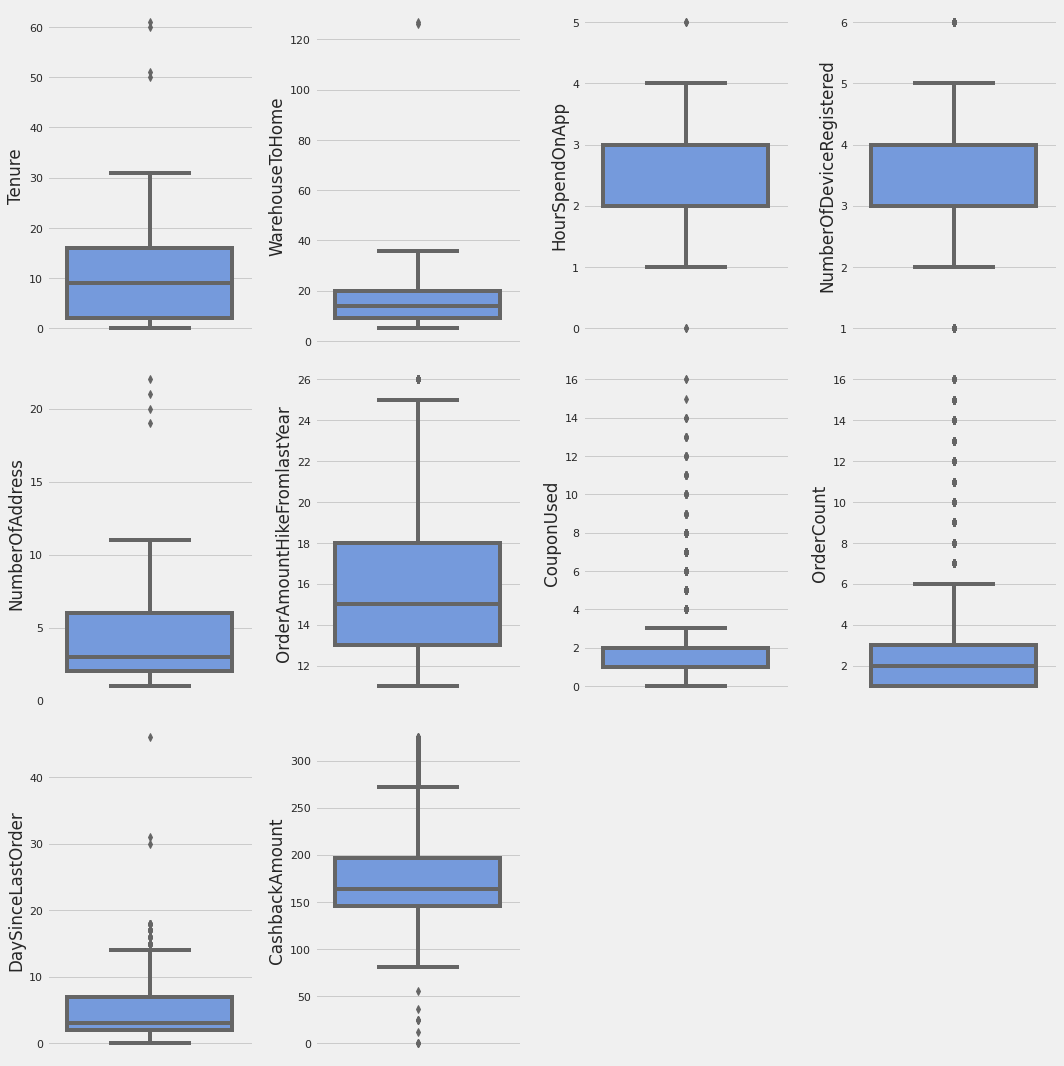

In [16]:
features = kontinu_interval
plt.figure(figsize=(15,20))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.boxplot(y=df[features[i]], color='cornflowerblue', orient='v')
  plt.tight_layout()


1. Dari visualisasi boxplot di atas terdapat outlier yang sangat jauh jaraknya yaitu ada di kolom Tenure, WarehouseToHome, NumberOfAddress, dan DaySinceLastOrder.

2. Dan diketahui ada kolom yang menjalar skewed ke kanan yaitu Tenure, WarehouseToHome, NumberOfAddress, CouponUsed, OrderCount, dan DaySinceLastOrder.

### Individual Displot (kontinu_interval)

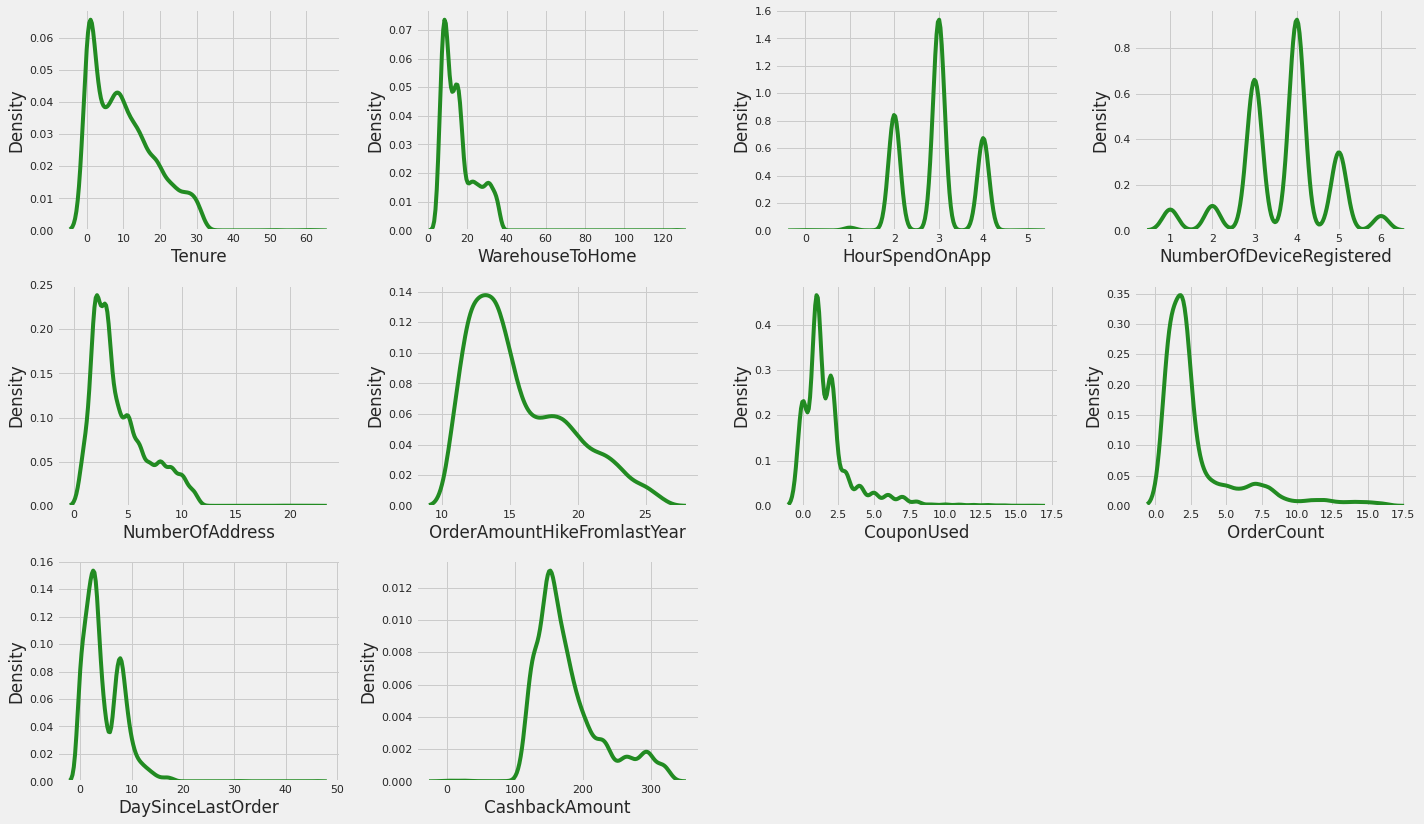

In [17]:
features = kontinu_interval
plt.figure(figsize=(20, 15))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.kdeplot(x=df[features[i]], color='forestgreen')
  plt.xlabel(features[i])
  plt.tight_layout()

Dapat dilihat dari visualisasi displot di atas : 

1. Kolom `Tenure`, `WarehouseToHome`, `NumberOfAddress`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, `DaySinceLastOrder` dan `CashbackAmount` mempunyai grafik yang skewed ke kanan (positively skew) dan pada saat nanti melakukan data preprocesing dapat melakukan feature transformation dengan menggunakan log transformation.

2. Kolom `NumberOfDeviceRegistered` menunjukan customer cenderung login lebih dari 1 device.

3. Kolom `HourSpendOnAPP` memiliki modus di 3 jam



### Individual Countplot (kategorikal_ordinal)

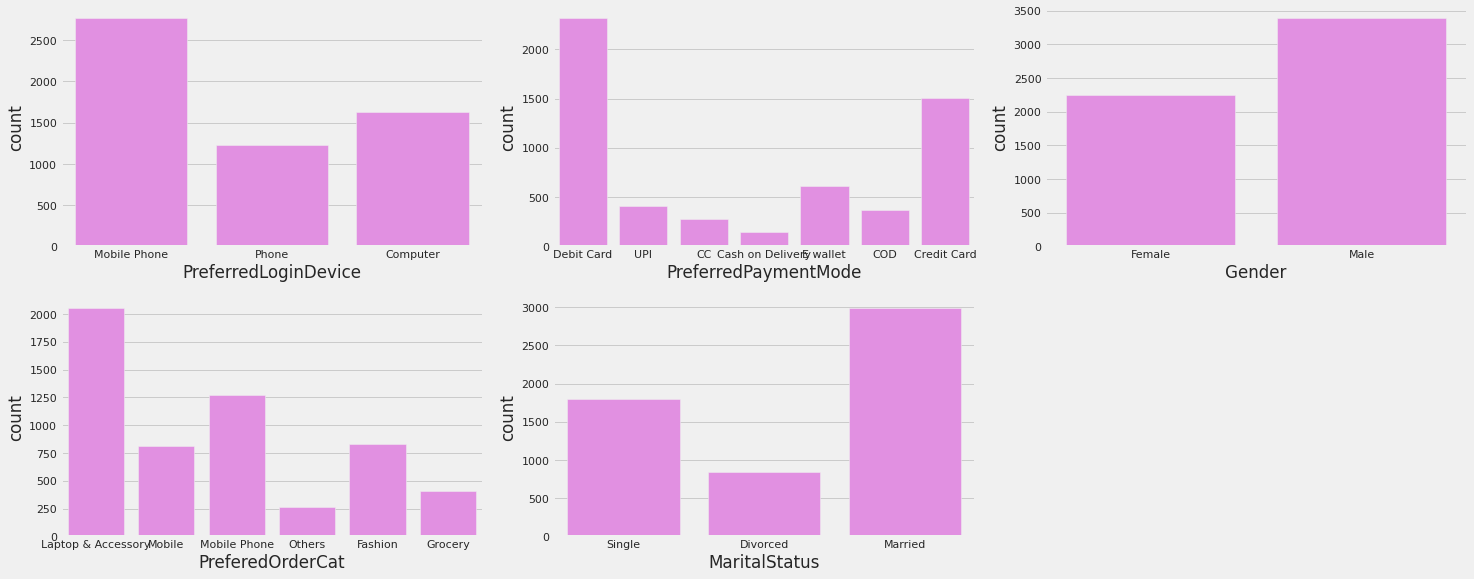

In [18]:
features = kategorikal_ordinal
for i in range(0, len(features)):
  plt.subplot(2, 3, i+1)
  sns.countplot(x=df[features[i]], color = 'violet')
  plt.tight_layout()

1. Kolom PrefferedLoginDevice mempunyai nilai yang mendominasi pada kategori Mobile Phone
2. Kolom PrefferedPaymentMode mempunyai nilai yang mendominasi pada 2 kategori yaitu Debit Card dan Credit Card
3. Kolom Gender mempunyai nilai yang mendominasi pada kategori Male
4. Kolom PreferedOrderCat mempunyai nilai yang mendominasi pada kategori Laptop & Accessory
5. Kolom MaritalStatus mempunyai nilai yang mendominast pada kategori Married

Saat nanti melakukan data preprocessing dapat melakukan feature encoding dengan menggunakan OHE (One Hot Encoding)

### Individual Countplot (kategorikal_numerikal)

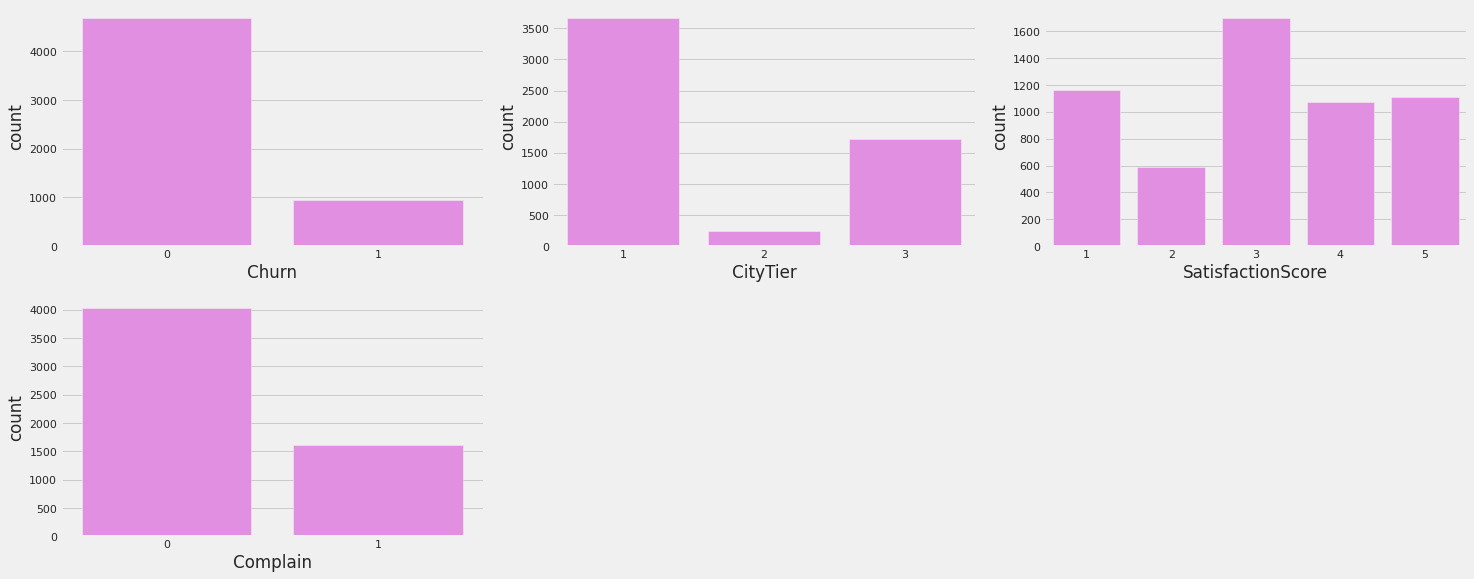

In [19]:
features = kategorikal_nominal
for i in range(0, len(features)):
  plt.subplot(2, 3, i+1)
  sns.countplot(x=df[features[i]], color = 'violet')
  plt.tight_layout()

1. Kolom `CityTier` menunjukan bahwa customer dengan katagori 1 mendominasi.
2. Kolom `SatisfactionScore` mempunyai nilai yang mendominasi pada angka 3.


## Multivariate Analysis

### Correlation Heatmap (Numeric)

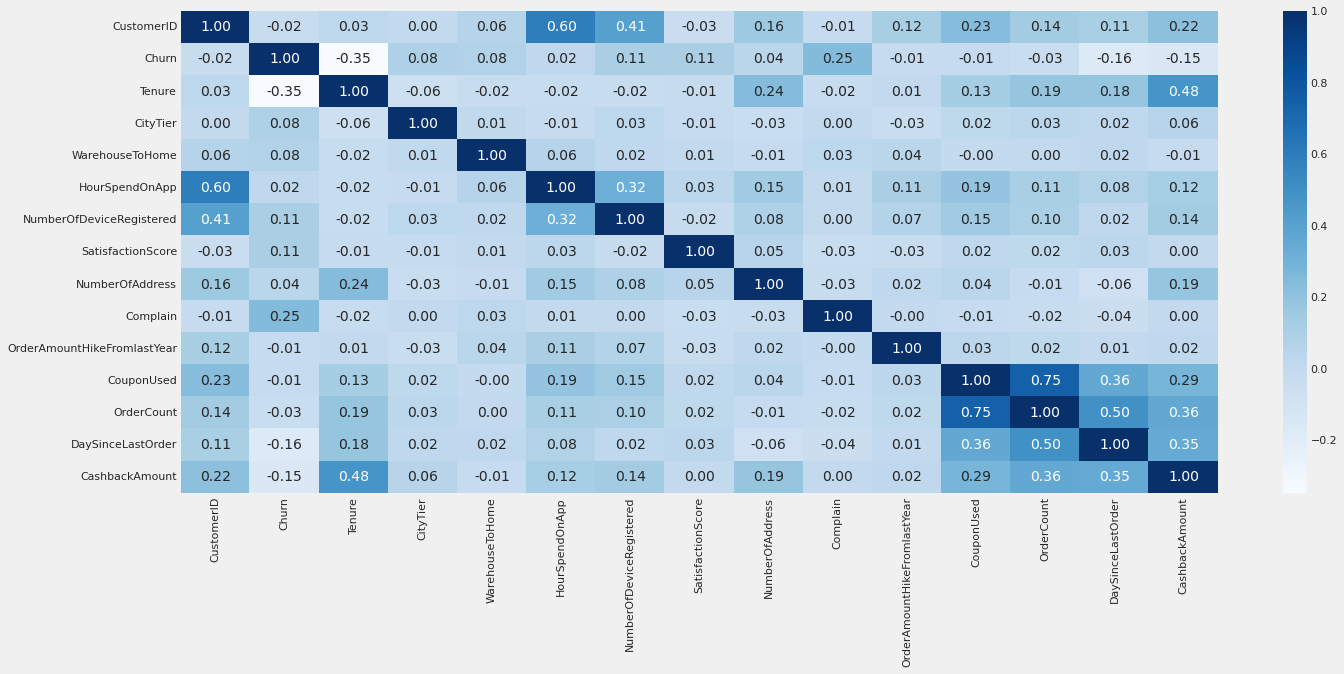

In [20]:
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dari Visualisasi Heatmap di atas, terlihat bahwa : 
1. Target (Churn) memiliki kolerasi positif dengan `CityTier`, `WarehouseToHome`, `NumberOfDeviceRegistered`, `SatisfactionScore`, `Complain`
2. Target (Churn) memiliki kolerasi negatif `Tenure`,  `DaySinceLastOrder`, dan `CashbackAmount`.
3. Target (Churn) dengan `HourSpendOnApp`,`NumberOfAddress`, `OrderAmoundHikeFromlastYear`, `CouponUsed`, `OrderCount` memiliki kolerasi sangat lemah ~0, ini menandakan bisa jadi fitur tersebut tidak potensial
4. `OrderCount` memiliki kolerasi cukup kuat dengan `CouponUsed`. Hal tersebut bisa dikatakan redundant

### Korelasi antar Target dan Fitur

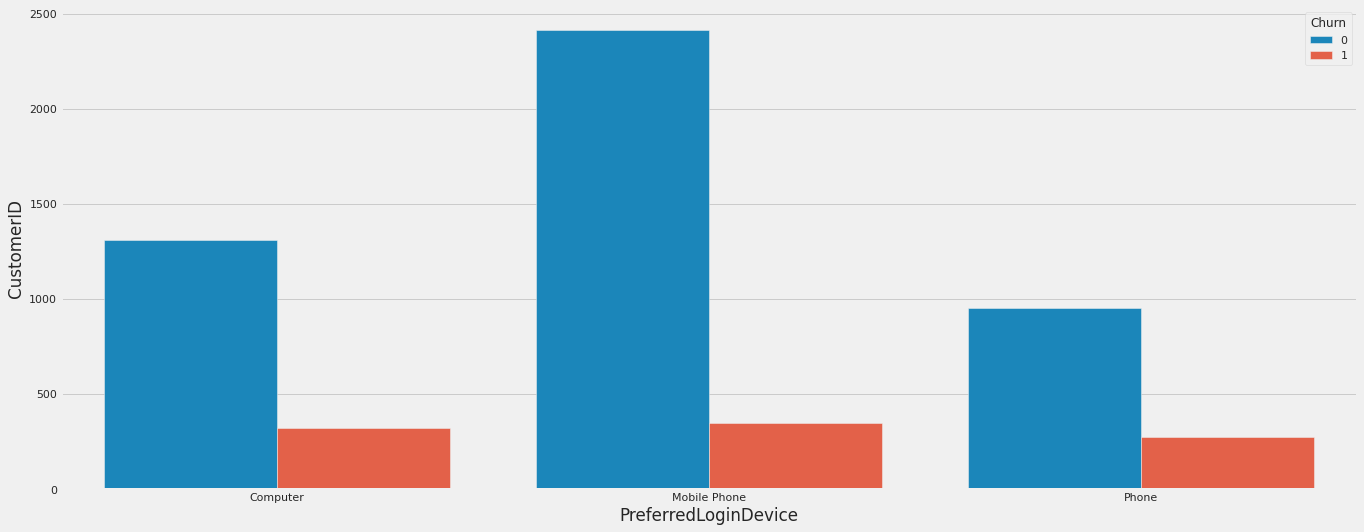

In [21]:
df9=df.groupby(['PreferredLoginDevice','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='PreferredLoginDevice', y ='CustomerID', hue='Churn', data=df9)

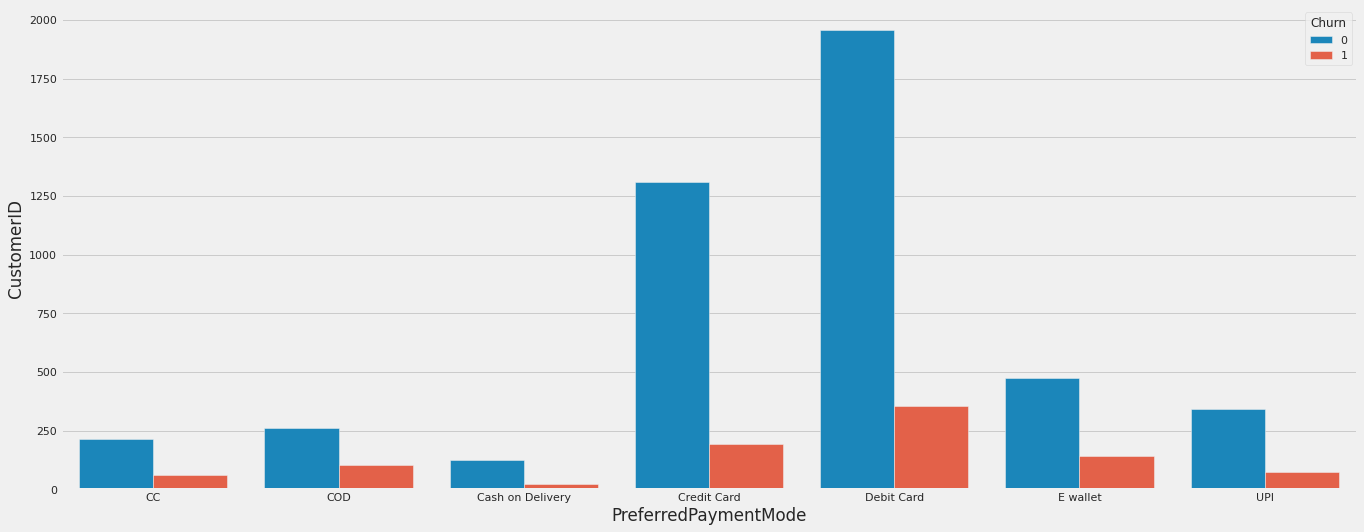

In [22]:
df10=df.groupby(['PreferredPaymentMode','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='PreferredPaymentMode', y ='CustomerID', hue='Churn', data=df10)

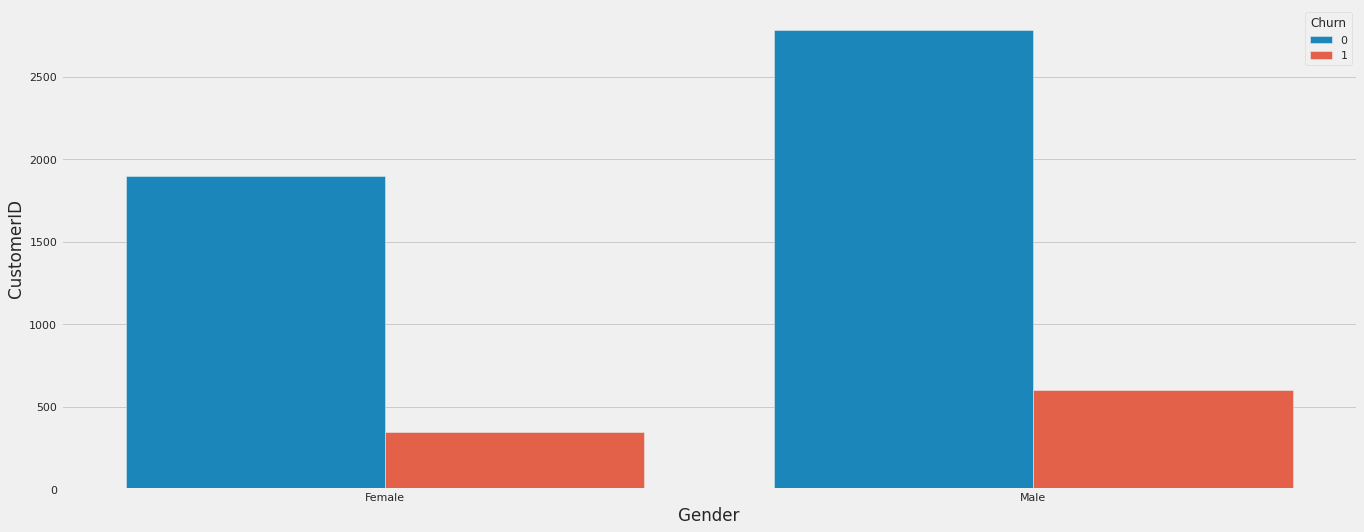

In [23]:
df11=df.groupby(['Gender','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='Gender', y ='CustomerID', hue='Churn', data=df11)

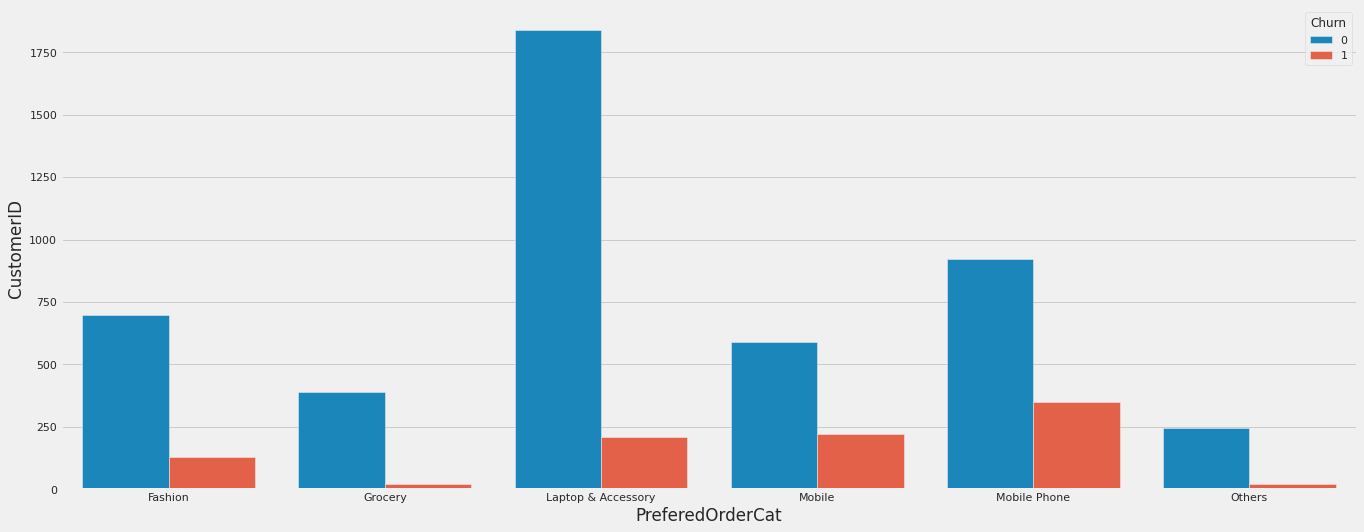

In [24]:
df12=df.groupby(['PreferedOrderCat','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='PreferedOrderCat', y ='CustomerID', hue='Churn', data=df12)

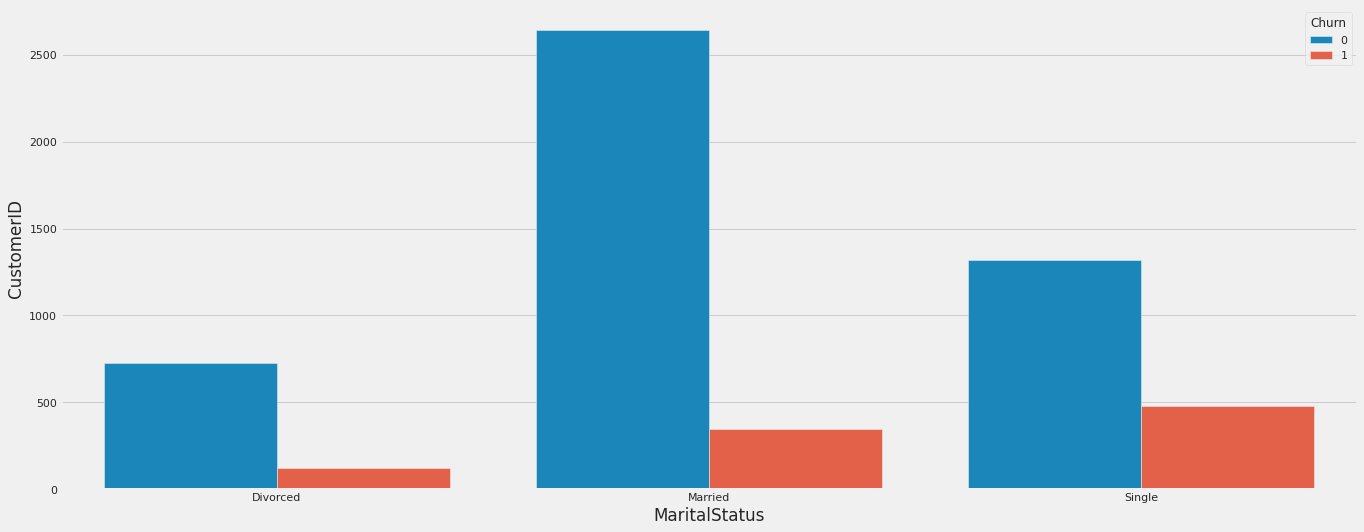

In [25]:
df13=df.groupby(['MaritalStatus','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='MaritalStatus', y ='CustomerID', hue='Churn', data=df13)

Dari visualisasi diatas, terlihat bahwa : 
1. Pada Fitur PreferredLoginDevice, Computer dan Mobile Phone memiliki potensi churn paling tinggi.
2. Pada Fitur PreferredPaymentMode, Debit Card memiliki potensi Churn paling tinggi 
3. Pada Fitur Gender, Male memiliki potensi churn paling tinggi 
4. Pada Fitur PreferredOrderCat, Mobile Phone memiliki potensi churn paling tinggi
5. Pada Fitur MaritalStatus, Single memiliki potensi Churn paling tinggi


## Business Insight

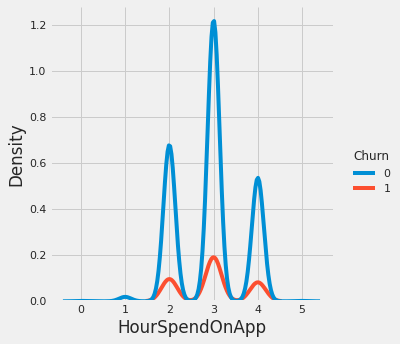

In [26]:
sns.displot(x='HourSpendOnApp', hue='Churn', data=df, kind='kde')

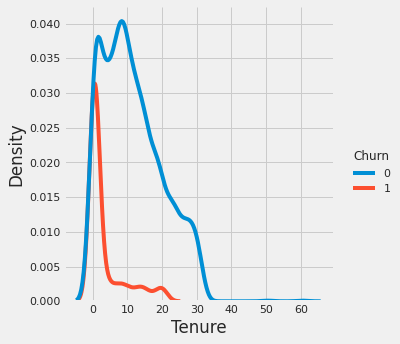

In [27]:
sns.displot(x='Tenure', hue='Churn', data=df, kind='kde')

#### Business Insight 1. 

Terdapat kolerasi yang cukup tinggi antara customerID dengan HourSpendOnApp. Namun, antara Churn dengan HourSpendOnApp memiliki kolerasi yang cukup lemah (dibawah 0,05). Hal tersebut menandakan bahwa customer yang membuka App dengan waktu yang lama belum tentu akan menjadi pembeli pada App. Berbanding terbalik dengan Tenure yang memiliki kolerasi yang cukup kuat. Hal tersebut mengartikan bahwa Tim Marketing bisa memfokuskan kepada customer yang sudah lama menggunakan App dalam pemberian promo agar bisa mempertahankan customer lama (bisa dikatakan loyal customer). Karena, customer baru bisa dikatakan sebagai One Time Buyer. 


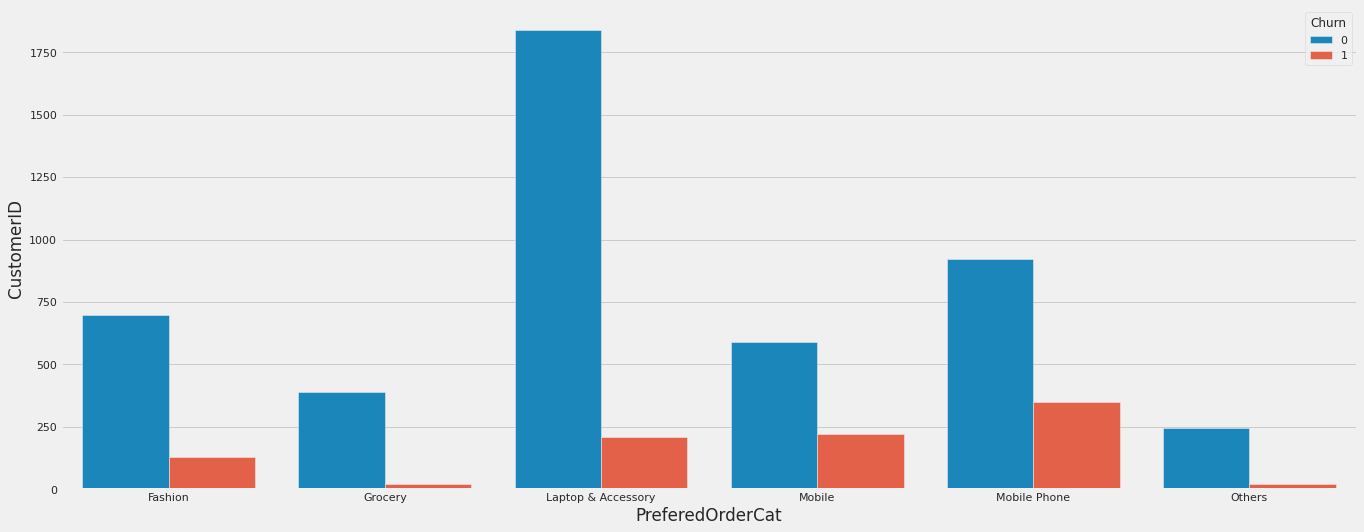

In [28]:
df12=df.groupby(['PreferedOrderCat','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='PreferedOrderCat', y ='CustomerID', hue='Churn', data=df12)

#### Business Insight 2. 

Dalam pemberian promo, Tim Marketing harus tepat sasaran dengan menyesuaikan dengan behavior (kemampuan belanja) customer. Salah satu contohnya bisa melihat dari PrefferedOrderCat. Misal customer yang memiliki kebiasaan untuk membeli produk Fashion, bisa diberikan promo yang berhubungan dengan produk Fashion. Sedangkan untuk customer yang memiliki kebiasaan untuk membeli produk Laptop & Accessory bisa diberikan promo yang berhubungan dengan produk Laptop & Accessory. Hal tersebut dapat mengurangi kemungkinan untuk Churn


#### Business Insight 3.
Melihat dari correlation heatmap, tingkat complain masih cenderung tinggi. oleh karena itu team marketing harus memantau komplain pelanggan secara berkala agar segera menindak lanjuti saat terjadi jika keluhan pelanggan di tangani secara, kemungkinan besar customer akan tetap loyal kepada aplikasi Bukapedia. Selain itu komplain pelanggan juga dapat menjadi peluang untuk meningkatkan produk dan layanan dan dapat meningkatkan SatisfactionRate.
